# Validation and verification cases

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# number of points per axis (total points will be N^N)
N = 250

# square horizontal (x) and vertical (y) axis
x = np.linspace(-1,1,N)
y = -np.linspace(-1,1,N)

# square meshgrid
X, Y = np.meshgrid(x,y)

In [3]:
# square polar meshgrid
r = np.sqrt(X**2+Y**2)
theta = np.arctan(Y/X)

In [4]:
# circle meshgrid (from squared meshgrid)
U = X*np.sqrt(1-Y**2/2)
V = Y*np.sqrt(1-X**2/2)

To provide validation and verification, some [well-known examples](http://www.braeunig.us/space/pics/fig1-14.gif) will be defined and simulated.

## Tubular grain distribution

In [5]:
# select the radius of the inner hole
a = r<0.25

# create a full fueled square
Z = 2*np.ones(U.shape)
# remove the hole for grain distribution
Z[a] = 0

In [6]:
# save the tubular distribution initialization file
np.savetxt('./examples/tubular', Z)

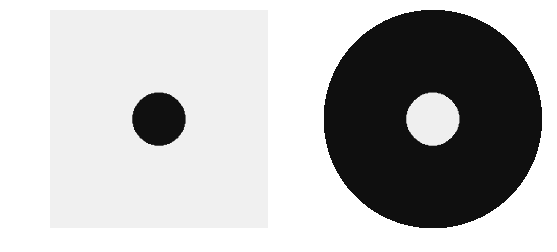

In [7]:
# plot the tubular distribution
fig, ax = plt.subplots(1, 2,figsize=(9,4))
ax[0].contourf(X,Y,Z,cmap = plt.cm.get_cmap('binary_r'))
ax[1].contourf(U,V,Z,cmap = plt.cm.get_cmap('binary'))
ax[0].axis('off')
ax[1].axis('off')
ax[0].axis('equal')
ax[1].axis('equal');

## Rod and tube grain distribution

In [8]:
# select the radius of the inner and outer cutss
b = np.logical_and(r<0.55, r>0.45)

# create a full fueled square
Z = 2*np.ones(U.shape)
# remove the hole for grain distribution
Z[b] = 0

In [9]:
# save the rodTube distribution initialization file
np.savetxt('./examples/rodTube', Z)

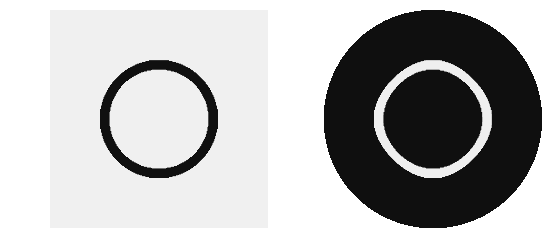

In [10]:
# plot the rodTube distribution
fig, ax = plt.subplots(1, 2,figsize=(9,4))
ax[0].contourf(X,Y,Z,cmap = plt.cm.get_cmap('binary_r'))
ax[1].contourf(U,V,Z,cmap = plt.cm.get_cmap('binary'))
ax[0].axis('off')
ax[1].axis('off')
ax[0].axis('equal')
ax[1].axis('equal');

## Star grain distribution

In [11]:
# star of N points
N = 5
# finger width (rad)
w = 0.2
# inner circle
r0 = 0.07
# outer circle
r1 = 0.3

In [12]:
# create a linspace of the angles if 2pi is divided in N+1
angles = np.linspace(0,2*np.pi,N+1)[:-1]

# make a copy of those angles
correctedAngles = np.copy(angles)
# given that theta is defined between -90 and 90, let's correct the angles
correctedAngles[np.logical_and(3*np.pi/2 > angles, angles > np.pi/2)] -= np.pi
correctedAngles[3*np.pi/2 < angles] -= 2*np.pi

# add the width to the angles
initAngle = correctedAngles - w
endAngle = correctedAngles + w

# if the N divisions go through 90 or 180, correct the angles
initAngle[angles == np.pi/2] = np.pi/2 - w
initAngle[angles == 3*np.pi/2] = np.pi/2 - w
endAngle[angles == np.pi/2] = -np.pi/2 + w
endAngle[angles == 3*np.pi/2] = -np.pi/2 + w

# list to store boolean matrix for each N divisions
finger = []

# append the different 'fingers'
for i in range(N):
    # if the angle is on the positive x-axis 
    if angles[i] < np.pi/2 or angles[i] > 3*np.pi/2:
        # the boolean matrix is formed by the union of a circle of radius r1 and positive x
        finger.append(np.logical_and(np.logical_and(x>0,r<r1),
        # and the space located between the angles of the lists
                                     np.logical_and(theta>initAngle[i],theta<endAngle[i])))
    # if the angle is exactly pi/2
    elif angles[i] == np.pi/2:
        finger.append(np.logical_and(np.logical_and(y>0,r<r1),
                                     np.logical_or(theta>initAngle[i],theta<endAngle[i])))
    # if the angle is exactly 3*pi/2
    elif angles[i] == 3*np.pi/2:
        finger.append(np.logical_and(np.logical_and(y<0,r<r1),
                                     np.logical_or(theta>initAngle[i],theta<endAngle[i])))
    # if the angle is on the negative x-axis 
    else:
        finger.append(np.logical_and(np.logical_and(x<0,r<r1),
                                     np.logical_and(theta>initAngle[i],theta<endAngle[i])))

# create a full False array
mat = False*np.ones(finger[0].shape)

# apply the 'or' operator with all fingers and the preallocated array 
for i in range(len(finger)):
    mat = np.logical_or(mat,finger[i])
    
# join the fingers with a centered circle of radius r0
c = np.logical_or(mat, r<r0)

# create a full fueled square
Z = 2*np.ones(U.shape)
# remove the hole for grain distribution
Z[c] = 0

In [13]:
# save the star distribution initialization file
np.savetxt('./examples/star',Z)

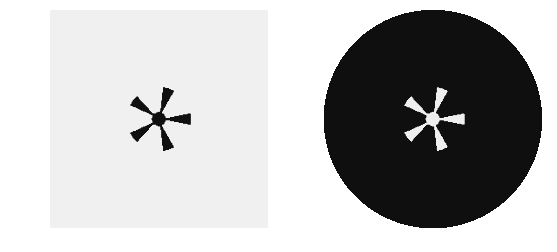

In [14]:
# plot the star distribution
fig, ax = plt.subplots(1, 2,figsize=(9,4))
ax[0].contourf(X,Y,Z,cmap = plt.cm.get_cmap('binary_r'))
ax[1].contourf(U,V,Z,cmap = plt.cm.get_cmap('binary'))
ax[0].axis('off')
ax[1].axis('off')
ax[0].axis('equal')
ax[1].axis('equal');

## Cross grain distribution

In [15]:
# select the width of the castings
w = 0.07

# create a boolean matrix 
d = np.logical_or(np.logical_and(-w < Y,Y < w),np.logical_and(-w < X,X < w))

# create a full fueled square
Z = 2*np.ones(U.shape)
# remove the hole for grain distribution
Z[d] = 0

In [16]:
# save the cross distribution initialization file
np.savetxt('./examples/cross',Z)

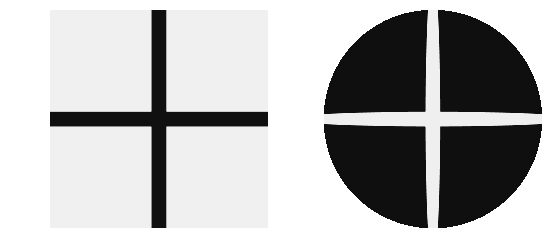

In [17]:
# plot the cross distribution
fig, ax = plt.subplots(1, 2,figsize=(9,4))
ax[0].contourf(X,Y,Z,cmap = plt.cm.get_cmap('binary_r'))
ax[1].contourf(U,V,Z,cmap = plt.cm.get_cmap('binary'))
ax[0].axis('off')
ax[1].axis('off')
ax[0].axis('equal')
ax[1].axis('equal');

## Double anchor grain distribution

In [18]:
# inner radius of the anchor
r0 = 0.6
# outer radius of the anchor
r1 = 0.5
# length of the anchor
l = 0.3
# width of the center line
w = 0.05

# center line
f1 = np.logical_and(np.logical_and(X<w, -w<X),np.logical_and(Y<r1, -r1<Y))
# upper anchor
f2 = np.logical_and(np.logical_and(r<r0, r>r1),Y>r0-l)
# lower anchor
f3 = np.logical_and(np.logical_and(r<r0, r>r1),Y<l-r0)

# join all three parts
f = np.logical_or(np.logical_or(f1,f2),f3)

# create a full fueled square
Z = 2*np.ones(U.shape)
# remove the hole for grain distribution
Z[f] = 0

In [19]:
# save the doubleAnchor distribution initialization file
np.savetxt('./examples/doubleAnchor',Z)

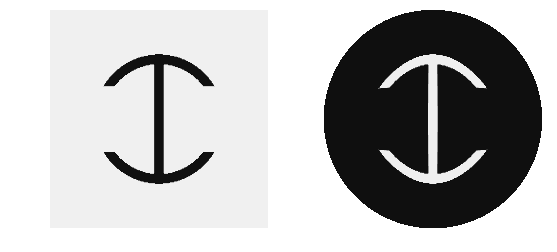

In [20]:
# plot the doubleAnchor distribution
fig, ax = plt.subplots(1, 2,figsize=(9,4))
ax[0].contourf(X,Y,Z,cmap = plt.cm.get_cmap('binary_r'))
ax[1].contourf(U,V,Z,cmap = plt.cm.get_cmap('binary'))
ax[0].axis('off')
ax[1].axis('off')
ax[0].axis('equal')
ax[1].axis('equal');

## Jellyfish grain distribution

This is the same as for *star*, but parameters have been tweaked to have different shape

In [21]:
# star of N points
N = 12
# finger width (rad)
w = 0.12
# inner circle
r0 = 0.4
# outer circle
r1 = 0.6

In [22]:
# create a linspace of the angles if 2pi is divided in N+1
angles = np.linspace(0,2*np.pi,N+1)[:-1]

# make a copy of those angles
correctedAngles = np.copy(angles)
# given that theta is defined between -90 and 90, let's correct the angles
correctedAngles[np.logical_and(3*np.pi/2 > angles, angles > np.pi/2)] -= np.pi
correctedAngles[3*np.pi/2 < angles] -= 2*np.pi

# add the width to the angles
initAngle = correctedAngles - w
endAngle = correctedAngles + w

# if the N divisions go through 90 or 180, correct the angles
initAngle[angles == np.pi/2] = np.pi/2 - w
initAngle[angles == 3*np.pi/2] = np.pi/2 - w
endAngle[angles == np.pi/2] = -np.pi/2 + w
endAngle[angles == 3*np.pi/2] = -np.pi/2 + w

# list to store boolean matrix for each N divisions
finger = []

# append the different 'fingers'
for i in range(N):
    # if the angle is on the positive x-axis 
    if angles[i] < np.pi/2 or angles[i] > 3*np.pi/2:
        # the boolean matrix is formed by the union of a circle of radius r1 and positive x
        finger.append(np.logical_and(np.logical_and(x>0,r<r1),
        # and the space located between the angles of the lists
                                     np.logical_and(theta>initAngle[i],theta<endAngle[i])))
    # if the angle is exactly pi/2
    elif angles[i] == np.pi/2:
        finger.append(np.logical_and(np.logical_and(y>0,r<r1),
                                     np.logical_or(theta>initAngle[i],theta<endAngle[i])))
    # if the angle is exactly 3*pi/2
    elif angles[i] == 3*np.pi/2:
        finger.append(np.logical_and(np.logical_and(y<0,r<r1),
                                     np.logical_or(theta>initAngle[i],theta<endAngle[i])))
    # if the angle is on the negative x-axis 
    else:
        finger.append(np.logical_and(np.logical_and(x<0,r<r1),
                                     np.logical_and(theta>initAngle[i],theta<endAngle[i])))

# create a full False array
mat = False*np.ones(finger[0].shape)

# apply the 'or' operator with all fingers and the preallocated array 
for i in range(len(finger)):
    mat = np.logical_or(mat,finger[i])
    
# join the fingers with a centered circle of radius r0
c = np.logical_or(mat, r<r0)

# create a full fueled square
Z = 2*np.ones(U.shape)
# remove the hole for grain distribution
Z[c] = 0

In [23]:
# save the jellyfish distribution initialization file
np.savetxt('./examples/jellyfish',Z)

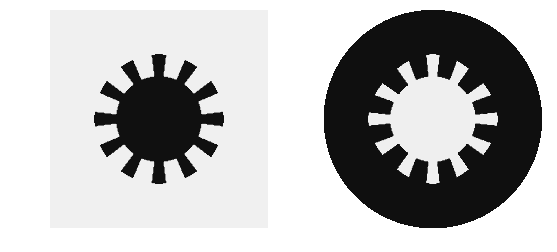

In [24]:
# plot the jellyfish distribution
fig, ax = plt.subplots(1, 2,figsize=(9,4))
ax[0].contourf(X,Y,Z,cmap = plt.cm.get_cmap('binary_r'))
ax[1].contourf(U,V,Z,cmap = plt.cm.get_cmap('binary'))
ax[0].axis('off')
ax[1].axis('off')
ax[0].axis('equal')
ax[1].axis('equal');